# TRAIN MODEL

In [417]:
import pandas as pd
import numpy as np
from google.colab import drive

In [418]:
 !pip install sastrawi

# 1. Mengambil hasil scraping komentar youtube

In [419]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [420]:
destination_file= "/content/drive/MyDrive/a_scraping_youtube_comment_sentiment_analysis/submission_1"

In [421]:
path_drive= destination_file + "/youtube_comments.csv"
youtube_comment_df = pd.read_csv(path_drive)

# Menghitung jumlah komentar dan jumlah kolom
sum_of_comment, sum_of_column = youtube_comment_df.shape
youtube_comment_df.info()
print()
print("Sum of comment and Sum of column")
print("--------------------------------")
print(f"Sum of comment: {sum_of_comment}")
print(f"Sum of column : {sum_of_column}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58250 entries, 0 to 58249
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   author           58250 non-null  object
 1   urlimageProfile  58250 non-null  object
 2   authorUrl        58250 non-null  object
 3   authorIdChannel  58250 non-null  object
 4   like_count       58250 non-null  int64 
 5   textComment      58250 non-null  object
 6   rating           58250 non-null  object
 7   updated_at       58250 non-null  object
 8   public           58250 non-null  bool  
dtypes: bool(1), int64(1), object(7)
memory usage: 3.6+ MB

Sum of comment and Sum of column
--------------------------------
Sum of comment: 58250
Sum of column : 9


In [422]:
youtube_comment_df.head(100)

,author,urlimageProfile,authorUrl,authorIdChannel,like_count,textComment,rating,updated_at,public
0,@cglsikamprets7894,https://yt3.ggpht.com/ytc/AIdro_mGWKhXa6L8lEEC...,http://www.youtube.com/@cglsikamprets7894,{'value': 'UCdfIbVHQjc2fEbdGnTgOieg'},10196,Boleh lah bang HP nya di hibahkan ke kami kare...,none,2020-07-18T10:37:10Z,True
1,@mongahulonthalo6043,https://yt3.ggpht.com/ytc/AIdro_lf4MZ7lQA-76v5...,http://www.youtube.com/@mongahulonthalo6043,{'value': 'UCH-pg1YeyA3OVe-rhUSYN0g'},8796,"No body:\n\nMental miskin: ""bang, giveaway don...",none,2020-03-04T04:09:21Z,True
2,@prastyaadhi_,https://yt3.ggpht.com/LHtFk0apOuQ8k9I8RaHXuyEL...,http://www.youtube.com/@prastyaadhi_,{'value': 'UCVDefeWYkkKnJz4A_l6xdWQ'},8732,Orang Lain : _Temen jadi Pelanggan dapet Harga...,none,2020-03-04T04:17:29Z,True
3,@nazmyaulia163,https://yt3.ggpht.com/ytc/AIdro_lqf-ZICgdIqvns...,http://www.youtube.com/@nazmyaulia163,{'value': 'UC0jmH5zH0-AM0ytWS31kcqA'},5771,Siapa yg sering ikut giveaway tapi gak pernah ...,none,2020-03-29T08:17:41Z,True
4,@andikafertela6168,https://yt3.ggpht.com/ytc/AIdro_nTs4RPUc0K5mwb...,http://www.youtube.com/@andikafertela6168,{'value': 'UClGyv_MPmknnqD22W7BB7zg'},3777,Salah satu channel yang berhasil menolong juta...,none,2020-04-19T13:19:18Z,True
...,...,...,...,...,...,...,...,...,...
95,@bangdayat4111,https://yt3.ggpht.com/ytc/AIdro_lHfWlTJcygC1pq...,http://www.youtube.com/@bangdayat4111,{'value': 'UCxpRjI2nM6CuE7uDtURU-zQ'},104,8:07 - 8:10 tuh jawaban yg ngemis Giveaway....,none,2020-03-04T07:44:54Z,True
96,@_scorpion66,https://yt3.ggpht.com/K5Zc5eNGYMmUf0IFRut83st1...,http://www.youtube.com/@_scorpion66,{'value': 'UC5cnkLvCA3niRwNLEdoE8JQ'},103,"""Give Away""\n""Give Away""\n""Give Away""\n""Give A...",none,2020-03-05T06:31:46Z,True
97,@AdamPPG,https://yt3.ggpht.com/ytc/AIdro_mn6NgjLMFbOBQW...,http://www.youtube.com/@AdamPPG,{'value': 'UCv3oxMdh6upyM46nNUOYVZg'},101,No nody: \n\nJiwa Sederhana:\nDijual murah aja...,none,2020-06-21T09:41:25Z,True
98,@bintanga3349,https://yt3.ggpht.com/ytc/AIdro_nNKrlueAfkbpxI...,http://www.youtube.com/@bintanga3349,{'value': 'UCdgTRldZbX4CAMHg9ZZwUSg'},99,"""Give awayy""\n""Give awayy"" \n""Give awayy""\n""Gi...",none,2020-03-18T08:31:20Z,True


# 2. Data Processing

In [423]:
# Membersikan dan Membuat DataFrame (youtubeComment_df(yc_df))
clean_yc_df = youtube_comment_df.dropna()

In [424]:
# Membersikan baris yang sama dari DataFrame (youtubeComment_df(yc_df))
yc_df = clean_yc_df.drop_duplicates()

# jumlah komentar dan kolom setealh dihapus
new_sum_of_comment, new_sum_of_column = yc_df.shape

In [425]:
yc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58243 entries, 0 to 58249
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   author           58243 non-null  object
 1   urlimageProfile  58243 non-null  object
 2   authorUrl        58243 non-null  object
 3   authorIdChannel  58243 non-null  object
 4   like_count       58243 non-null  int64 
 5   textComment      58243 non-null  object
 6   rating           58243 non-null  object
 7   updated_at       58243 non-null  object
 8   public           58243 non-null  bool  
dtypes: bool(1), int64(1), object(7)
memory usage: 4.1+ MB


# 3. Preprocessing Text

In [426]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

**3.1. Membersihkan teks komentar**

In [427]:
def textCleaning(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

**3.2 Mengubah semua karakter dalam teks menjadi huruf kecil**

In [428]:
def textCasefolding(text):
    text = text.lower()
    return text

**3.3. Membagi teks string menjadi daftar token**

In [429]:
def textTokenizing(text):
    text = word_tokenize(text)
    return text

In [430]:
'''
import spacy
nlp = spacy.blank("id")

def textLemmatized(text):
   doc = nlp(text)
   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]
   return ' '.join(tokens)'''

'\nimport spacy\nnlp = spacy.blank("id")\n\ndef textLemmatized(text):\n   doc = nlp(text)\n   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]\n   return \' \'.join(tokens)'

**3.4. Menghapus kata-kata yang tidak memiliki makna (stopwords)**

In [431]:
def textFiltering(text):
    list_ina = set(stopwords.words('indonesian'))
    list_eng = set(stopwords.words('english'))
    list_ina.update(list_eng)
    list_ina.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for i in text:
        if i not in list_ina:
            filtered.append(i)
    text = filtered
    return text

**3.5. Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata**

In [432]:
def stemmingText(text): #
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

**3.6. Mengubah daftar kata menjadi kalimat**

In [433]:
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

**3.7.  Menghapus kumpulan slang words atau kata-kata informal yang sering digunakan dalam percakapan sehari-hari, terutama pada media sosial atau obrolan online**

In [434]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

**3.8. NLTK (Natural Language Toolkit).**

In [435]:
import nltk
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.
pd.options.mode.copy_on_write = True # Mengaktifkan mode copy_on_write

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [436]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
yc_df['text_clean'] = yc_df['textComment'].apply(textCleaning)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
yc_df['text_casefoldingText'] = yc_df['text_clean'].apply(textCasefolding)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
yc_df['text_slangwords'] = yc_df['text_casefoldingText'].apply(fix_slangwords)

#yc_df['stemmingText'] = yc_df['text_slangwords'].apply(stemmingText)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
yc_df['text_tokenizingText'] = yc_df['text_slangwords'].apply(textTokenizing)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
yc_df['text_stopword'] = yc_df['text_tokenizingText'].apply(textFiltering)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
yc_df['text_akhir'] = yc_df['text_stopword'].apply(toSentence)

In [437]:
yc_df.head()

,author,urlimageProfile,authorUrl,authorIdChannel,like_count,textComment,rating,updated_at,public,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,@cglsikamprets7894,https://yt3.ggpht.com/ytc/AIdro_mGWKhXa6L8lEEC...,http://www.youtube.com/@cglsikamprets7894,{'value': 'UCdfIbVHQjc2fEbdGnTgOieg'},10196,Boleh lah bang HP nya di hibahkan ke kami kare...,none,2020-07-18T10:37:10Z,True,Boleh lah bang HP nya di hibahkan ke kami kare...,boleh lah bang hp nya di hibahkan ke kami kare...,boleh lah bang hp nya di hibahkan ke kami kare...,"[boleh, lah, bang, hp, nya, di, hibahkan, ke, ...","[bang, hp, hibahkan, musim, belajar, dirumah, ...",bang hp hibahkan musim belajar dirumah anak yg...
1,@mongahulonthalo6043,https://yt3.ggpht.com/ytc/AIdro_lf4MZ7lQA-76v5...,http://www.youtube.com/@mongahulonthalo6043,{'value': 'UCH-pg1YeyA3OVe-rhUSYN0g'},8796,"No body:\n\nMental miskin: ""bang, giveaway don...",none,2020-03-04T04:09:21Z,True,No body Mental miskin bang giveaway dong v,no body mental miskin bang giveaway dong v,no body mental miskin bang giveaway dong v,"[no, body, mental, miskin, bang, giveaway, don...","[body, mental, miskin, bang, giveaway, v]",body mental miskin bang giveaway v
2,@prastyaadhi_,https://yt3.ggpht.com/LHtFk0apOuQ8k9I8RaHXuyEL...,http://www.youtube.com/@prastyaadhi_,{'value': 'UCVDefeWYkkKnJz4A_l6xdWQ'},8732,Orang Lain : _Temen jadi Pelanggan dapet Harga...,none,2020-03-04T04:17:29Z,True,Orang Lain Temen jadi Pelanggan dapet Harga t...,orang lain temen jadi pelanggan dapet harga t...,orang lain temen jadi pelanggan dapet harga te...,"[orang, lain, temen, jadi, pelanggan, dapet, h...","[orang, temen, pelanggan, dapet, harga, temen,...",orang temen pelanggan dapet harga temen david ...
3,@nazmyaulia163,https://yt3.ggpht.com/ytc/AIdro_lqf-ZICgdIqvns...,http://www.youtube.com/@nazmyaulia163,{'value': 'UC0jmH5zH0-AM0ytWS31kcqA'},5771,Siapa yg sering ikut giveaway tapi gak pernah ...,none,2020-03-29T08:17:41Z,True,Siapa yg sering ikut giveaway tapi gak pernah ...,siapa yg sering ikut giveaway tapi gak pernah ...,siapa yg sering ikut giveaway tapi gak pernah ...,"[siapa, yg, sering, ikut, giveaway, tapi, gak,...","[yg, giveaway, menag, semoga, kalo, giveaway, ...",yg giveaway menag semoga kalo giveaway lg menang
4,@andikafertela6168,https://yt3.ggpht.com/ytc/AIdro_nTs4RPUc0K5mwb...,http://www.youtube.com/@andikafertela6168,{'value': 'UClGyv_MPmknnqD22W7BB7zg'},3777,Salah satu channel yang berhasil menolong juta...,none,2020-04-19T13:19:18Z,True,Salah satu channel yang berhasil menolong juta...,salah satu channel yang berhasil menolong juta...,salah satu channel yang berhasil menolong juta...,"[salah, satu, channel, yang, berhasil, menolon...","[salah, channel, berhasil, menolong, jutaan, o...",salah channel berhasil menolong jutaan orang i...


# 4. Pelabelan

**4.1. Membaca data kamus kata-kata Positif & Negatif dari GitHub**

In [438]:
import csv
import requests
from io import StringIO

In [439]:
# Kata-kata positif
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Kata-kata negatif
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

**4.2. Membuat fungsi untuk menentukan polaritas sentimen dari tweet**

In [440]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''

    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

results = yc_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
yc_df['polarity_score'] = results[0]
yc_df['polarity'] = results[1]
print(yc_df['polarity'].value_counts())

polarity
neutral     24365
positive    22663
negative    11215
Name: count, dtype: int64


# 5. Data Splitting dan Ekstraksi Fitur dengan TF-IDF

In [441]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import string
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [442]:
X = yc_df['text_akhir']
y = yc_df['polarity']

In [443]:
# Ekstraksi fitur dengan Bag of Words (BoW)
tfidf = CountVectorizer()
X_tfidf = tfidf.fit_transform(X)

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [444]:
# Membuat objek model Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = random_forest_classifier.predict(X_train)
y_pred_test_lr = random_forest_classifier.predict(X_test)

# Evaluasi akurasi model Random Forest Classifier pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Random Forest Classifier pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Random Forest Classifier- accuracy_train:', accuracy_train_lr)
print('Random Forest Classifier - accuracy_test:', accuracy_test_lr)

Random Forest Classifier- accuracy_train: 0.9999785380091857
Random Forest Classifier - accuracy_test: 0.904884539445446


In [445]:
# Membuat objek model Support Vector Machines
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = svm_model.predict(X_train)
y_pred_test_lr = svm_model.predict(X_test)

# Evaluasi akurasi model Support Vector Machines pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Support Vector Machines pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Support Vector Machines - accuracy_train:', accuracy_train_lr)
print('Support Vector Machines - accuracy_test:', accuracy_test_lr)

Support Vector Machines - accuracy_train: 0.9839035068892991
Support Vector Machines - accuracy_test: 0.9510687612670615


In [446]:
# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression(solver='lbfgs', max_iter=10000)

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train)
y_pred_test_lr = logistic_regression.predict(X_test)

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.9614542644975748
Logistic Regression - accuracy_test: 0.9239419692677483


In [447]:
yc_df.head()

,author,urlimageProfile,authorUrl,authorIdChannel,like_count,textComment,rating,updated_at,public,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity
0,@cglsikamprets7894,https://yt3.ggpht.com/ytc/AIdro_mGWKhXa6L8lEEC...,http://www.youtube.com/@cglsikamprets7894,{'value': 'UCdfIbVHQjc2fEbdGnTgOieg'},10196,Boleh lah bang HP nya di hibahkan ke kami kare...,none,2020-07-18T10:37:10Z,True,Boleh lah bang HP nya di hibahkan ke kami kare...,boleh lah bang hp nya di hibahkan ke kami kare...,boleh lah bang hp nya di hibahkan ke kami kare...,"[boleh, lah, bang, hp, nya, di, hibahkan, ke, ...","[bang, hp, hibahkan, musim, belajar, dirumah, ...",bang hp hibahkan musim belajar dirumah anak yg...,3,positive
1,@mongahulonthalo6043,https://yt3.ggpht.com/ytc/AIdro_lf4MZ7lQA-76v5...,http://www.youtube.com/@mongahulonthalo6043,{'value': 'UCH-pg1YeyA3OVe-rhUSYN0g'},8796,"No body:\n\nMental miskin: ""bang, giveaway don...",none,2020-03-04T04:09:21Z,True,No body Mental miskin bang giveaway dong v,no body mental miskin bang giveaway dong v,no body mental miskin bang giveaway dong v,"[no, body, mental, miskin, bang, giveaway, don...","[body, mental, miskin, bang, giveaway, v]",body mental miskin bang giveaway v,-5,negative
2,@prastyaadhi_,https://yt3.ggpht.com/LHtFk0apOuQ8k9I8RaHXuyEL...,http://www.youtube.com/@prastyaadhi_,{'value': 'UCVDefeWYkkKnJz4A_l6xdWQ'},8732,Orang Lain : _Temen jadi Pelanggan dapet Harga...,none,2020-03-04T04:17:29Z,True,Orang Lain Temen jadi Pelanggan dapet Harga t...,orang lain temen jadi pelanggan dapet harga t...,orang lain temen jadi pelanggan dapet harga te...,"[orang, lain, temen, jadi, pelanggan, dapet, h...","[orang, temen, pelanggan, dapet, harga, temen,...",orang temen pelanggan dapet harga temen david ...,17,positive
3,@nazmyaulia163,https://yt3.ggpht.com/ytc/AIdro_lqf-ZICgdIqvns...,http://www.youtube.com/@nazmyaulia163,{'value': 'UC0jmH5zH0-AM0ytWS31kcqA'},5771,Siapa yg sering ikut giveaway tapi gak pernah ...,none,2020-03-29T08:17:41Z,True,Siapa yg sering ikut giveaway tapi gak pernah ...,siapa yg sering ikut giveaway tapi gak pernah ...,siapa yg sering ikut giveaway tapi gak pernah ...,"[siapa, yg, sering, ikut, giveaway, tapi, gak,...","[yg, giveaway, menag, semoga, kalo, giveaway, ...",yg giveaway menag semoga kalo giveaway lg menang,-1,negative
4,@andikafertela6168,https://yt3.ggpht.com/ytc/AIdro_nTs4RPUc0K5mwb...,http://www.youtube.com/@andikafertela6168,{'value': 'UClGyv_MPmknnqD22W7BB7zg'},3777,Salah satu channel yang berhasil menolong juta...,none,2020-04-19T13:19:18Z,True,Salah satu channel yang berhasil menolong juta...,salah satu channel yang berhasil menolong juta...,salah satu channel yang berhasil menolong juta...,"[salah, satu, channel, yang, berhasil, menolon...","[salah, channel, berhasil, menolong, jutaan, o...",salah channel berhasil menolong jutaan orang i...,3,positive


# 6. Deep Learning

In [448]:
import tensorflow as tf
import keras as keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.layers import Dense,Embedding, LSTM, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.callbacks import ReduceLROnPlateau

In [449]:
sentiment = pd.get_dummies(yc_df['polarity']).astype(int)
final_yc_df = pd.concat([yc_df, sentiment], axis=1)
final_yc_df = final_yc_df.drop(columns='polarity')
final_yc_df

,author,urlimageProfile,authorUrl,authorIdChannel,like_count,textComment,rating,updated_at,public,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,negative,neutral,positive
0,@cglsikamprets7894,https://yt3.ggpht.com/ytc/AIdro_mGWKhXa6L8lEEC...,http://www.youtube.com/@cglsikamprets7894,{'value': 'UCdfIbVHQjc2fEbdGnTgOieg'},10196,Boleh lah bang HP nya di hibahkan ke kami kare...,none,2020-07-18T10:37:10Z,True,Boleh lah bang HP nya di hibahkan ke kami kare...,boleh lah bang hp nya di hibahkan ke kami kare...,boleh lah bang hp nya di hibahkan ke kami kare...,"[boleh, lah, bang, hp, nya, di, hibahkan, ke, ...","[bang, hp, hibahkan, musim, belajar, dirumah, ...",bang hp hibahkan musim belajar dirumah anak yg...,3,0,0,1
1,@mongahulonthalo6043,https://yt3.ggpht.com/ytc/AIdro_lf4MZ7lQA-76v5...,http://www.youtube.com/@mongahulonthalo6043,{'value': 'UCH-pg1YeyA3OVe-rhUSYN0g'},8796,"No body:\n\nMental miskin: ""bang, giveaway don...",none,2020-03-04T04:09:21Z,True,No body Mental miskin bang giveaway dong v,no body mental miskin bang giveaway dong v,no body mental miskin bang giveaway dong v,"[no, body, mental, miskin, bang, giveaway, don...","[body, mental, miskin, bang, giveaway, v]",body mental miskin bang giveaway v,-5,1,0,0
2,@prastyaadhi_,https://yt3.ggpht.com/LHtFk0apOuQ8k9I8RaHXuyEL...,http://www.youtube.com/@prastyaadhi_,{'value': 'UCVDefeWYkkKnJz4A_l6xdWQ'},8732,Orang Lain : _Temen jadi Pelanggan dapet Harga...,none,2020-03-04T04:17:29Z,True,Orang Lain Temen jadi Pelanggan dapet Harga t...,orang lain temen jadi pelanggan dapet harga t...,orang lain temen jadi pelanggan dapet harga te...,"[orang, lain, temen, jadi, pelanggan, dapet, h...","[orang, temen, pelanggan, dapet, harga, temen,...",orang temen pelanggan dapet harga temen david ...,17,0,0,1
3,@nazmyaulia163,https://yt3.ggpht.com/ytc/AIdro_lqf-ZICgdIqvns...,http://www.youtube.com/@nazmyaulia163,{'value': 'UC0jmH5zH0-AM0ytWS31kcqA'},5771,Siapa yg sering ikut giveaway tapi gak pernah ...,none,2020-03-29T08:17:41Z,True,Siapa yg sering ikut giveaway tapi gak pernah ...,siapa yg sering ikut giveaway tapi gak pernah ...,siapa yg sering ikut giveaway tapi gak pernah ...,"[siapa, yg, sering, ikut, giveaway, tapi, gak,...","[yg, giveaway, menag, semoga, kalo, giveaway, ...",yg giveaway menag semoga kalo giveaway lg menang,-1,1,0,0
4,@andikafertela6168,https://yt3.ggpht.com/ytc/AIdro_nTs4RPUc0K5mwb...,http://www.youtube.com/@andikafertela6168,{'value': 'UClGyv_MPmknnqD22W7BB7zg'},3777,Salah satu channel yang berhasil menolong juta...,none,2020-04-19T13:19:18Z,True,Salah satu channel yang berhasil menolong juta...,salah satu channel yang berhasil menolong juta...,salah satu channel yang berhasil menolong juta...,"[salah, satu, channel, yang, berhasil, menolon...","[salah, channel, berhasil, menolong, jutaan, o...",salah channel berhasil menolong jutaan orang i...,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58245,@kobokanaeru3181,https://yt3.ggpht.com/hFrkfwo5Fr_bc4yvSX0Y8gUP...,http://www.youtube.com/@kobokanaeru3181,{'value': 'UC9CxryQ4nt7NsakKy_wQUIg'},0,gip iwiy gip iwiy palalu gip iwiy,none,2020-03-08T00:23:54Z,True,gip iwiy gip iwiy palalu gip iwiy,gip iwiy gip iwiy palalu gip iwiy,gip iwiy gip iwiy palalu gip iwiy,"[gip, iwiy, gip, iwiy, palalu, gip, iwiy]","[gip, iwiy, gip, iwiy, palalu, gip, iwiy]",gip iwiy gip iwiy palalu gip iwiy,0,0,1,0
58246,@buzztruckindo,https://yt3.ggpht.com/lCqlaEINZxbUAHYkhzT8SrmA...,http://www.youtube.com/@buzztruckindo,{'value': 'UCNnWoags6EhL_d8xV2AZzQA'},0,"""GIVEAWAY""\n""GIVEAWAY""\n""GIVEAWAY""\n""GIVEAWAY""...",none,2020-03-08T00:23:39Z,True,GIVEAWAY GIVEAWAY GIVEAWAY GIVEAWAY GIVEAWAY G...,giveaway giveaway giveaway giveaway giveaway g...,giveaway giveaway giveaway giveaway giveaway g...,"[giveaway, giveaway, giveaway, giveaway, givea...","[giveaway, giveaway, giveaway, giveaway, givea...",giveaway giveaway giveaway giveaway giveaway g...,2,0

In [450]:
X = final_yc_df['text_akhir'].values
y = final_yc_df[['negative','neutral','positive']].values

In [451]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(46594,)
(11649,)


In [452]:
tokenizer = Tokenizer(num_words=50000, oov_token='')

tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_train)

sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

padded_train = pad_sequences(sequence_train, padding='post', maxlen=50, truncating='post')
padded_test = pad_sequences(sequence_test, padding='post', maxlen=50, truncating='post')

In [453]:
model = Sequential([
    Embedding(input_dim=50000, output_dim=16, input_length=50),
    Conv1D(32, kernel_size=3, activation='relu', padding='same'),
    LSTM(32, return_sequences=True),
    LSTM(32, return_sequences=True),
    LSTM(32),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

In [454]:
# Compiling the Model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005), metrics=['accuracy'])

In [455]:
#set epoch Callback
class EpochCallback(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        print("Starting epoch {}".format(epoch + 1))

    def on_epoch_end(self, epoch, logs=None):
        print("Finished epoch {}".format(epoch + 1))

In [456]:
# set function CheckpointCallback when loss < 0.1
class CheckpointCallback(keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        current_accuracy = logs.get("accuracy")
        current_val_accuracy = logs.get("val_accuracy")
        print("Current accuracy is {}".format(current_accuracy))
        print("Current val accuracy is {}".format(current_val_accuracy))
        if( current_accuracy > 0.85 and current_val_accuracy > 0.85):
          print("\nAkurasi telah mencapai >85%")
          self.model.stop_training = True

In [457]:
reduce_lrate = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(
    padded_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(padded_test, y_test),
    validation_steps=5,
    callbacks=[EpochCallback(), CheckpointCallback(), reduce_lrate]
)

Starting epoch 1
Epoch 1/10
1456/1457 [============================>.] - ETA: 0s - loss: 0.7436 - accuracy: 0.6635Finished epoch 1
Current accuracy is 0.6635189056396484
Current val accuracy is 0.574999988079071
1457/1457 [==============================] - 120s 78ms/step - loss: 0.7436 - accuracy: 0.6635 - val_loss: 0.9130 - val_accuracy: 0.5750 - lr: 5.0000e-04
Starting epoch 2
Epoch 2/10
1457/1457 [==============================] - ETA: 0s - loss: 0.4496 - accuracy: 0.8408Finished epoch 2
Current accuracy is 0.8407949805259705
Current val accuracy is 0.800000011920929
1457/1457 [==============================] - 111s 76ms/step - loss: 0.4496 - accuracy: 0.8408 - val_loss: 0.5412 - val_accuracy: 0.8000 - lr: 5.0000e-04
Starting epoch 3
Epoch 3/10
1456/1457 [============================>.] - ETA: 0s - loss: 0.3101 - accuracy: 0.8923Finished epoch 3
Current accuracy is 0.8923466801643372
Current val accuracy is 0.8687499761581421

Akurasi telah mencapai >85%
1457/1457 [=================

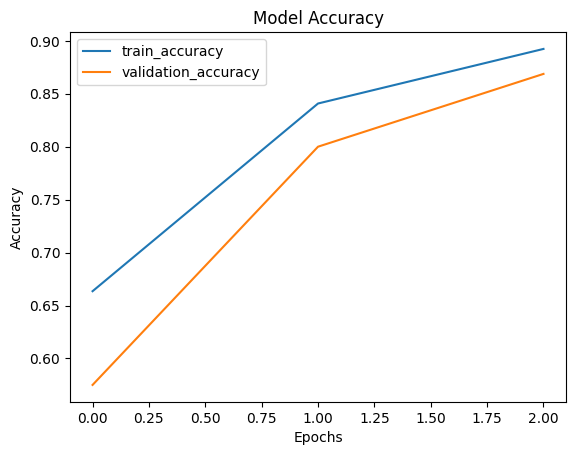

In [458]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

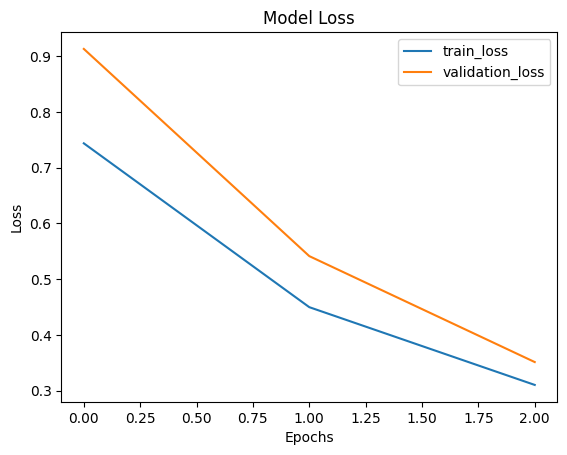

In [459]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 6. Evaluate

In [460]:
loss, accuracy = model.evaluate(padded_test, y_test)
print(f'Akurasi pada data uji: {accuracy:.4f}')

365/365 [==============================] - 8s 22ms/step - loss: 0.3119 - accuracy: 0.8838
Akurasi pada data uji: 0.8838


In [461]:
y_pred = model.predict(padded_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

365/365 [==============================] - 8s 18ms/step


In [462]:
# Evaluasi akurasi menggunakan accuracy_score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Akurasi pada data uji: {accuracy:.4f}')

Akurasi pada data uji: 0.8838


In [463]:
from sklearn.metrics import classification_report
target_names = ['negative','neutral','positive']
print(classification_report(y_test_classes, y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.75      0.80      0.77      2212
     neutral       0.96      0.85      0.90      4893
    positive       0.88      0.96      0.92      4544

    accuracy                           0.88     11649
   macro avg       0.86      0.87      0.87     11649
weighted avg       0.89      0.88      0.88     11649



#. Save model

In [464]:
# Simpan model sentiment analysis
model.save('model_youtube_comments_sentiment_analysis.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [465]:
# Simpan tokenizer
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# 9. Load Model & Test Predict Model

In [466]:
# Fungsi prediksi
def predict_sentiment(text, tokenizer, model):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, padding='post', maxlen=50, truncating='post')
    prediction = model.predict(padded_sequence)
    sentiment = ['negative', 'neutral', 'positive']
    return sentiment[np.argmax(prediction)]

In [467]:
# Memuat model yang telah disimpan
loaded_model = tf.keras.models.load_model('model_youtube_comments_sentiment_analysis.h5')

In [468]:
# load tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [473]:
# Contoh penggunaan test random dengan input text sendiri
text_sample = "Sukses selalu dan subscriber itu bukan dibeli"
predicted_sentiment = predict_sentiment(text_sample, tokenizer, loaded_model)
print(f'Sentimen dari teks contoh: {predicted_sentiment}')

1/1 [==============================] - 0s 74ms/step
Sentimen dari teks contoh: positive


# Create requirements

In [470]:
!pip freeze > all_requirements.txt

In [471]:
required_packages = [
    "scikit-learn",
    "pandas",
    "numpy",
    "matplotlib",
    "keras",
]

# Library reading
with open("all_requirements.txt", "r") as file:
    lines = file.readlines()

# library filtering
with open("requirements.txt", "w") as file:
    for line in lines:
        package_name = line.split("==")[0]
        if package_name in required_packages:
            file.write(line)
# finishing
with open("requirements.txt", "r") as file:
    requirements = file.read()
print(requirements)

keras==2.15.0
matplotlib==3.7.1
numpy==1.25.2
pandas==2.0.3
scikit-learn==1.3.2



In [472]:
source_file= "/content/requirements.txt"
!cp {source_file} {destination_file}